In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
import torch
from tensorflow import keras
#import keras
# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Flatten, BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation

print(tf.__version__)

1.15.0


Using TensorFlow backend.


In [2]:
!unzip train_size.zip #images

Archive:  train_size.zip
  inflating: train_size/1.jpg        
  inflating: train_size/10.jpg       
  inflating: train_size/100.jpg      
  inflating: train_size/101.jpg      
  inflating: train_size/102.jpg      
  inflating: train_size/103.jpg      
  inflating: train_size/104.jpg      
  inflating: train_size/105.jpg      
  inflating: train_size/106.jpg      
  inflating: train_size/107.jpg      
  inflating: train_size/108.jpg      
  inflating: train_size/109.jpg      
  inflating: train_size/11.jpg       
  inflating: train_size/110.jpg      
  inflating: train_size/111.jpg      
  inflating: train_size/112.jpg      
  inflating: train_size/113.jpg      
  inflating: train_size/114.jpg      
  inflating: train_size/115.jpg      
  inflating: train_size/116.jpg      
  inflating: train_size/117.jpg      
  inflating: train_size/118.jpg      
  inflating: train_size/119.jpg      
  inflating: train_size/12.jpg       
  inflating: train_size/120.jpg      
  inflating: train_size/1

In [0]:
train = pd.read_csv('train_size.csv')

In [4]:
train.head()

,img,size_
0,1.jpg,1
1,2.jpg,2
2,3.jpg,2
3,4.jpg,0
4,5.jpg,0


In [5]:
train.shape

(905, 2)

In [6]:
train[train.size_ == 0].shape, train[train.size_ == 1].shape, train[train.size_ == 2].shape #кол-во классов

((280, 2), (335, 2), (290, 2))

In [7]:
!unzip test_size.zip #images

Archive:  test_size.zip
  inflating: test_size/100.jpg       
  inflating: test_size/101.jpg       
  inflating: test_size/102.jpg       
  inflating: test_size/103.jpg       
  inflating: test_size/104.jpg       
  inflating: test_size/105.jpg       
  inflating: test_size/106.jpg       
  inflating: test_size/107.jpg       
  inflating: test_size/108.jpg       
  inflating: test_size/109.jpg       
  inflating: test_size/110.jpg       
  inflating: test_size/112.jpg       
  inflating: test_size/113.jpg       
  inflating: test_size/114.jpg       
  inflating: test_size/115.jpg       
  inflating: test_size/116.jpg       
  inflating: test_size/117.jpg       
  inflating: test_size/118.jpg       
  inflating: test_size/119.jpg       
  inflating: test_size/120.jpg       
  inflating: test_size/121.jpg       
  inflating: test_size/122.jpg       
  inflating: test_size/123.jpg       
  inflating: test_size/124.jpg       
  inflating: test_size/125.jpg       
  inflating: test_size/126

In [0]:
test = pd.read_csv('test_size.csv')

In [9]:
test.head()

,img,size_
0,100.jpg,1
1,101.jpg,1
2,102.jpg,2
3,103.jpg,0
4,104.jpg,0


In [10]:
test.shape

(169, 2)

In [11]:
test[test.size_ == 0].shape, test[test.size_ == 1].shape, test[test.size_ == 2].shape #кол-во классов

((60, 2), (48, 2), (61, 2))

In [0]:
hei = 128
wei = 64

**Добавление данных в x_test, y_test**

In [13]:
x_test = []
y_test = []

for i in range (test.shape[0]):
    x,y = test.values[i]
    x = cv2.imread('test_size/{}'.format(x))
    #x = strong_aug(p=0.2)
    x = cv2.resize(x, (hei, wei))
    x_test += [x]
    y_test += [y]
    
x_test = np.array(x_test) / 255.
y_test = np.array(y_test)

x_test.shape

(169, 64, 128, 3)

**Генератор батчей для train**

In [0]:
#Объявим генератор
def keras_generator(gen_df, batch_size):#генератор картинок в батч (создание батча)
    while True:
        x_train = []
        y_train = []
        

        for i in range (batch_size):

            x,y = train.sample(1).values[0]
            x = cv2.imread('train_size/{}'.format(x))
            #x = strong_aug(p=0.2)
            x = cv2.resize(x, (hei, wei))
            x_train += [x]
            y_train += [y]

        #y_train = keras.utils.to_categorical(y_train,10)
        x_train = np.array(x_train) / 255.
        y_train = np.array(y_train)

        yield x_train, y_train

**Архитектура сети**

In [15]:
inp = Input(shape=(wei, hei, 3))

conv_1_1 = Conv2D(32, (3, 3), padding='same')(inp)
conv_1_1 = Activation('relu')(conv_1_1)

conv_1_2 = Conv2D(32, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)

pool_1 = MaxPooling2D(2)(conv_1_2)
pool_1 = Dropout(0.2)(pool_1)
pool_1 = BatchNormalization()(pool_1)

conv_2_1 = Conv2D(64, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)

conv_2_2 = Conv2D(64, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)

pool_2 = MaxPooling2D(2)(conv_2_2)
pool_2 = Dropout(0.2)(pool_2)
pool_2 = BatchNormalization()(pool_2)


conv_3_1 = Conv2D(128, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)

conv_3_2 = Conv2D(128, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2) #conv_3_2.shape = (64,64,128)

pool_3 = MaxPooling2D(2)(conv_3_2) #pool_3.shape = (32,32,128)
pool_3 = Dropout(0.2)(pool_3)
pool_3 = BatchNormalization()(pool_3)


conv_4_1 = Conv2D(256, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)

conv_4_2 = Conv2D(256, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2) #conv_4_2.shape = (32,32,256)

pool_4 = MaxPooling2D(2)(conv_4_2) #pool_4.shape = (16,16,256)
pool_4 = Dropout(0.2)(pool_4)
pool_4 = BatchNormalization()(pool_4)



flat = Flatten()(pool_4)
layer1 = Dense(128, activation='relu')(flat)
layer1 = Dropout(0.2)(layer1)
layer1 = BatchNormalization()(layer1)

layer2 = Dense(256, activation='relu')(layer1)
layer2 = Dropout(0.2)(layer2)
layer2 = BatchNormalization()(layer2)

layer3 = Dense(512, activation='relu')(layer2)
layer3 = Dropout(0.2)(layer3)
layer3 = BatchNormalization()(layer3)

layer4 = Dense(64, activation='relu')(layer3)
layer4 = Dropout(0.25)(layer4)
layer4 = BatchNormalization()(layer4)

layer_out = Dense(3, activation='softmax')(layer4)

model = Model(inputs=inp, outputs=layer_out)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









In [0]:
#model.summary()

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Обучение через генератор, т.е. с батчами**

In [17]:
batch_size = 32
model.fit_generator(keras_generator(train, batch_size),
              steps_per_epoch=100,#каждую эпоху - 100 батчей
              epochs=30,
              verbose=1,#будем выводить результат
              shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
100/100 [==============================] - 19s 191ms/step - loss: 1.1536 - acc: 0.5091
Epoch 2/30
100/100 [==============================] - 10s 102ms/step - loss: 0.6296 - acc: 0.7241
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5257 - acc: 0.7781
Epoch 4/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4635 - acc: 0.8119
Epoch 5/30
100/100 [==============================] - 10s 99ms/step - loss: 0.4216 - acc: 0.8266
Epoch 6/30
100/100 [==============================] - 10s 100ms/step - loss: 0.3862 - acc: 0.8500
Epoch 7/30
100/100 [==============================] - 10s 100ms/step - loss: 0.3301 - acc: 0.8688
Epoch 8/30
100/100 [==============================] - 10s 99ms/step - loss: 0.3027 - acc: 0.8838
Epoch 9/30
100/100 [==============================] - 10s 99ms/step - loss: 0.2413 - acc: 0.9091
Epoch 10/30
100/100 [====

In [0]:
for x_train,y_train in keras_generator(train,train.shape[0]):
    break

In [19]:
x_train.shape

(905, 64, 128, 3)

In [23]:
train_loss, train_acc = model.evaluate(x_train, y_train)

print('\nТочность на обучающей выборке:', train_acc)
print('\nОшибка на обучающей выборке:', train_loss)

905/905 [==============================] - 1s 696us/sample - loss: 0.0197 - acc: 0.9923

Точность на обучающей выборке: 0.99226516

Ошибка на обучающей выборке: 0.019723391112516434


In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nТочность на тестовой выборке:', test_acc)
print('\nОшибка на тестовой выборке:', test_loss)

169/169 [==============================] - 0s 449us/sample - loss: 0.9249 - acc: 0.7929

Точность на тестовой выборке: 0.7928994

Ошибка на тестовой выборке: 0.9249203329927911


In [22]:
#model.save('neural_network_size.h5') #сохранение нейросети в файл

from tensorflow.keras.models import load_model
model = load_model('!!!79!!! neural_network_size.h5') #загрузка нейросети из файла

#pred = model.predict(x_test) #предсказание

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
pred = model.predict(x_test)

In [26]:
pred.shape

(169, 3)

In [27]:
np.argmax(pred[15]),y_test[15]

(1, 2)

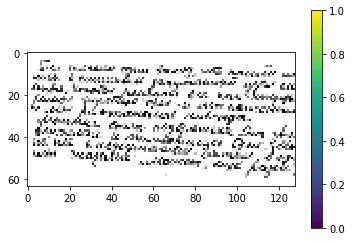

In [28]:
plt.figure()
plt.imshow(x_test[15])
plt.colorbar()
plt.grid(False)
plt.show()

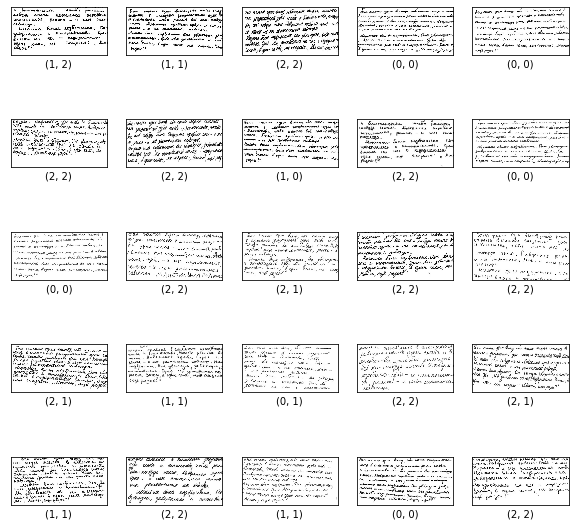

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel((y_test[i],np.argmax(pred[i])))
plt.show()

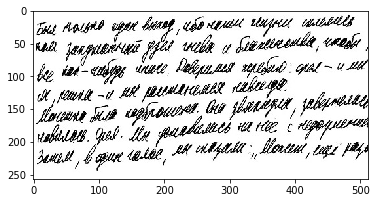

In [30]:
way='106.jpg'
#img = Image.open(way)
img = cv2.imread(way)
plt.imshow(img)
img = cv2.resize(img, (hei, wei)) / 255.

In [0]:
'''def binarize_array(numpy_array):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if (numpy_array[i][j][0] > 150 and numpy_array[i][j][1] > 150 and numpy_array[i][j][2] > 150
                or numpy_array[i][j][0] > 180 or numpy_array[i][j][1] > 180 or numpy_array[i][j][2] > 180):
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array
img = binarize_array(img)
img = cv2.resize(img, (hei, wei))
plt.imshow(img)'''

In [0]:
pred_img = model.predict(img.reshape(1,wei,hei,3))

In [32]:
print('Pred_img: ',np.argmax(pred_img))

Pred_img:  2
